<a href="https://colab.research.google.com/github/elizamelo/LabFis04/blob/main/LabFis4Polarizacao_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt

Laboratório de Física IV

Prática 01: Intensidade Luminosa

obj.: Verificar a relação:  

I(r)/I_max = cos^2 (theta)

y=m.x+b

y=I(r)/I_max; x= cos^2 (theta); m_t=1 e b_t=0

Dados do Exemplo: I_max=10 w/m²; 


Grupo 01: turma 3

 theta=[0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0] 
 
 IR=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0]


In [2]:
I_m=10

In [3]:
#ângulo

#[1.0,0.97,0.883,0.750,0.587,0.413,0.250,0.117,0.030] 
ang=[0,10,20,30,40,50,60,70,80]
 


In [4]:
#Intensidades Relativas:

I =[10.0,9.0,8.8,7.8,6.3,4.1,2.4,1.0,0]

In [5]:
x=(np.cos(np.deg2rad(ang))*np.cos(np.deg2rad(ang)))
print(x)
N_medidas = len(x)
print ( "Número de medidas: {}".format( N_medidas ) )
     


[1.         0.96984631 0.88302222 0.75       0.58682409 0.41317591
 0.25       0.11697778 0.03015369]
Número de medidas: 9


In [6]:
y=np.divide(I,I_m)
print(y)

[1.   0.9  0.88 0.78 0.63 0.41 0.24 0.1  0.  ]


In [7]:
media_X = x.mean()
media_X2 = (x**2).mean( )
var_X_populacional = ( x ** 2 ).mean() - ( media_X ** 2 )
dp_X_populacional = np.sqrt( var_X_populacional )
print ( "Média (cm): {}".format( media_X ) )
print ( "Média quadrados(cm²): {}".format( media_X2 ) )
print ( "Variância (cm²): {}".format( var_X_populacional ) )
print ( "Desvio padrão (cm): {}".format( dp_X_populacional ) )
     


Média (cm): 0.5555555555555556
Média quadrados(cm²): 0.4305555555555556
Variância (cm²): 0.12191358024691357
Desvio padrão (cm): 0.34916125249934815


In [8]:
media_Y = y.mean()
media_Y2 = ( y** 2 ).mean()
var_Y_populacional = ( y ** 2 ).mean() - ( media_Y ** 2 )
dp_Y_populacional = np.sqrt( var_Y_populacional )
print ( "Média : {}".format( media_Y ) )
print ( "Média quadrados: {}".format( media_Y2 ) )
print ( "Variância : {}".format( var_Y_populacional ) )
print ( "Desvio padrão : {}".format( dp_Y_populacional ) )

Média : 0.5488888888888889
Média quadrados: 0.42504444444444445
Variância : 0.12376543209876545
Desvio padrão : 0.351803115533057


In [9]:
x_X_y = ( x * y ).mean()
cov_populacional = x_X_y - ( media_X * media_Y )
coeficiente_correlacao = cov_populacional / ( dp_X_populacional * dp_Y_populacional )
print ( "Covariância (logr × logIr): {}".format( cov_populacional ) )
print ( "Coeficiente de correlação: {}".format( coeficiente_correlacao ) )
     

Covariância (logr × logIr): 0.12236398525210873
Coeficiente de correlação: 0.9961572247764311


Coeficientes:


In [10]:
coeficiente_m = cov_populacional / var_X_populacional
print ( "Coeficiente m (cm): {}".format( coeficiente_m ) )


Coeficiente m (cm): 1.0036944613084362


In [11]:

coeficiente_b = media_Y - coeficiente_m * media_X # cm
print ( "Coeficiente b (cm): {}".format( coeficiente_b ) )

Coeficiente b (cm): -0.008719145171353526


Incertezas:

In [12]:
arr_desvios_ajuste = ( y - ( coeficiente_m * x + coeficiente_b ) )
arr_desvios_ajuste

array([ 0.00502468, -0.06471022,  0.00243463,  0.0359483 ,  0.04972706,
        0.00401677, -0.00220447, -0.0086908 , -0.02154595])

In [13]:
print ( arr_desvios_ajuste ** 2 )
print ( "Soma quadrado desvios (cm): {}".format( ( arr_desvios_ajuste ** 2 ).sum() ) )
     


[2.52474479e-05 4.18741321e-03 5.92743385e-06 1.29228021e-03
 2.47278024e-03 1.61344540e-05 4.85968867e-06 7.55300593e-05
 4.64227792e-04]
Soma quadrado desvios (cm): 0.008544400538371527


In [14]:
ep_y_1 = np.sqrt( ( arr_desvios_ajuste ** 2 ).sum() / ( N_medidas - 2 ) )
print ( "epsilon_y = {}".format( ep_y_1 ) )
     


epsilon_y = 0.034937496308962805


In [15]:
ep_y_2 = dp_Y_populacional * np.sqrt( ( N_medidas / ( N_medidas - 2 ) ) * ( 1. - coeficiente_correlacao ** 2 ) )
print ( "epsilon_y = {}".format( ep_y_2 ) )

epsilon_y = 0.034937496308960196


In [16]:
ep_y = ep_y_2
sigma_m = ep_y / ( dp_X_populacional * np.sqrt( N_medidas ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( sigma_m ) )


Incerteza padrão coeficiente m (cm): 0.033353735615347165


In [17]:
sigma_b = sigma_m * np.sqrt( media_X2 )
print ( "Incerteza padrão coeficiente b (cm): {}".format( sigma_b ) )

Incerteza padrão coeficiente b (cm): 0.02188563140524598


Estimativas para os coeficientes:

In [18]:
print ( "m = {:.2f} ± {:.2f} (cm)".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ) )

m = 1.00 ± 0.03 (cm)


In [19]:
print ( "b = {} ± {} (cm)".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ) )

b = -0.01 ± 0.02 (cm)


Text(0.4, 0.85, '$b = -0.01 \\pm 0.02\\,$')

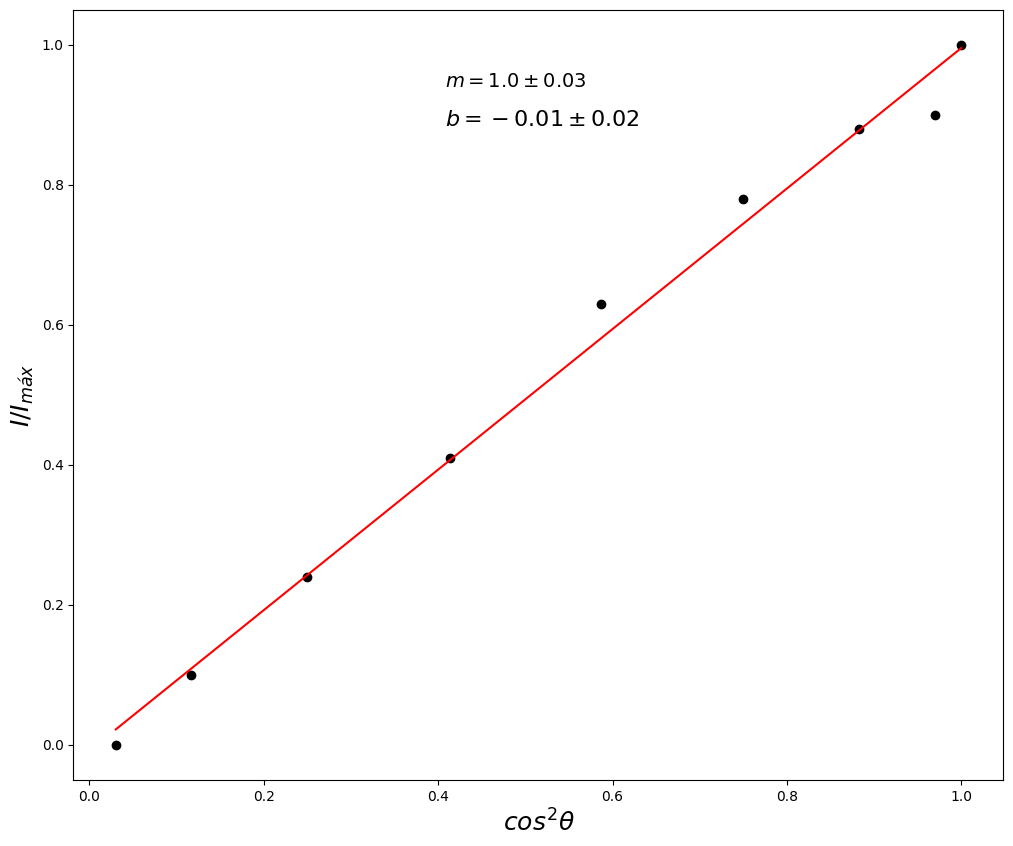

In [27]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( coeficiente_m * x + coeficiente_b ), '-r' )
plt.xlabel( r"$cos^{2}\theta $", fontsize=18)
plt.ylabel( r"$I/I_{máx}$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}\,$".format( np.round( coeficiente_m, 2 ), np.round( sigma_m, 2 ) ),
          fontsize=14, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,$".format( np.round( coeficiente_b, 2 ), np.round( sigma_b, 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )

Usando um pacote:

In [21]:
from scipy.optimize import curve_fit

def pol1(x, p0, p1):
   return p0 + p1*x

popt_lin, pcov_lin = curve_fit( pol1, x, y, p0=(0.,0.) )
print ( popt_lin, pcov_lin )

[-0.00871914  1.00369446] [[ 0.00047898 -0.00061804]
 [-0.00061804  0.00111247]]


In [22]:
print ( "Coeficiente m (cm): {}".format( popt_lin[ 1 ] ) )
print ( "Incerteza padrão coeficiente m (cm): {}".format( np.sqrt( pcov_lin[ 1, 1 ] ) ) )
print ( "a = {:.2f} ± {:.2f} (cm)".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ) )

Coeficiente m (cm): 1.0036944605046922
Incerteza padrão coeficiente m (cm): 0.03335373651696296
a = 1.00 ± 0.03 (cm)


In [23]:
print ( "Coeficiente b (cm): {}".format( popt_lin[ 0 ] ) )
print ( "Incerteza padrão coeficiente b (cm): {}".format( np.sqrt( pcov_lin[ 0, 0 ] ) ) )
print ( "{} ± {} (cm)".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ) )

Coeficiente b (cm): -0.008719144533045939
Incerteza padrão coeficiente b (cm): 0.021885630225639812
-0.01 ± 0.02 (cm)


Text(0.4, 0.85, '$b = -0.01 \\pm 0.02\\,$')

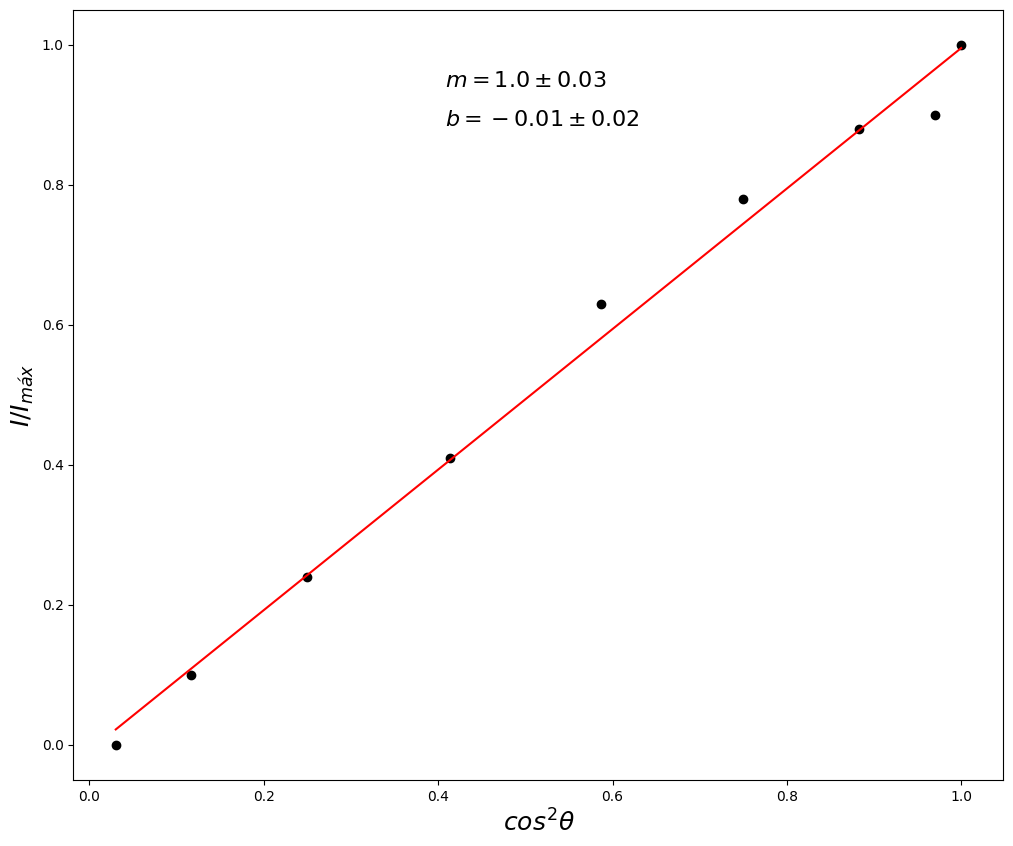

In [28]:
fig = plt.figure( figsize=(12,10) )

plt.plot( x, y, 'ko' )
plt.plot( x, ( popt_lin[ 0 ]  + popt_lin[ 1 ] * x ), '-r' )
plt.xlabel( r"$cos^{2}\theta $", fontsize=18)
plt.ylabel( r"$I/I_{máx}$", fontsize=18 )

plt.text( 0.4, 0.9,
          r"$m = {} \pm {}$".format( np.round( popt_lin[ 1 ], 2 ), np.round( np.sqrt( pcov_lin[ 1, 1 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )
plt.text( 0.4, 0.85,
          r"$b = {} \pm {}\,$".format( np.round( popt_lin[ 0 ], 2 ), np.round( np.sqrt( pcov_lin[ 0, 0 ] ), 2 ) ),
          fontsize=16, transform=plt.gca().transAxes )